<a href="https://colab.research.google.com/github/f247805/AML-Project/blob/main/crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tweepy



In [ ]:
import tweepy
import pandas as pd
from textblob import TextBlob
import re

# Step 1: Setup Twitter API Access
bearer_token = 'YOUR_BEARER_TOKEN'  # Replace with your Bearer Token

# Initialize Twitter API client
client = tweepy.Client(bearer_token=bearer_token)

# Step 2: Define your query (adjust to your needs)
query = 'crypto ban Pakistan OR bancrypto -is:retweet lang:en'

# Step 3: Fetch Tweets (up to 100 per request)
tweets = client.search_recent_tweets(query=query, tweet_fields=["text"], max_results=5000)

# Step 4: Create DataFrame from fetched tweets
tweets_data = [tweet.text for tweet in tweets.data]
df = pd.DataFrame(tweets_data, columns=["text"])


# Step 6: Perform Sentiment Analysis
# Optional: Save to CSV
df.to_csv("crypto_tweets.csv", index=False)


In [52]:
import pandas as pd
# Load the CSV file
file_path = "/content/crypto_tweets.csv"
df = pd.read_csv(file_path)

# Shuffle all the rows
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Display the first few rows of the shuffled DataFrame
df_shuffled.head(10)

,text
0,Crypto adoption will bring innovation to Pakis...
1,Too many people are misled by crypto promises....
2,Crypto is too risky for average Pakistanis. #1...
3,"Crypto might help, but only with proper regula..."
4,The crypto scene in Pakistan is developing slo...
5,I don't trust crypto—it seems too unstable for...
6,"As a Pakistani, I fully support the legalizati..."
7,Allowing crypto will only create financial cha...
8,"Crypto is interesting but risky, especially in..."
9,Legalizing crypto might have both risks and be...


In [53]:
import pandas as pd
import re



# Remove hash codes (e.g., #1234)
df['text'] = df['text'].apply(lambda x: re.sub(r'#\d+', '', x).strip())

# Fix common missing space issue between 'crypto' and 'it'
df['text'] = df['text'].str.replace(r'(crypto)(it)', r'\1 \2', regex=True)

# Optionally lowercase everything
df['text'] = df['text'].str.lower()

# Remove unwanted special characters (optional)
df['text'] = df['text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9.,!?\'\s]', '', x))

# Remove duplicates and extra whitespace
df['text'] = df['text'].str.strip()
df = df.drop_duplicates()

# Save cleaned version
df.to_csv("cleaned_crypto_sentiment_pakistan.csv", index=False)

print("Cleaned and saved to 'cleaned_crypto_sentiment_pakistan.csv'")


Cleaned and saved to 'cleaned_crypto_sentiment_pakistan.csv'


In [4]:
pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 2.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp311-cp311-linux_x86_64.whl size=4313487 sha256=2cb3355701f12bad6f9d3f7c8a81074969c09bfe70f392ac456940db6d16d0e9
  Stored in directory: /root/.cache/pip/wheels/65/4f/35/5057db0249224e9ab55a513fa6b79451473ceb7713017823c3
Successfully built fasttext


In [5]:
# Step 2: Download the pre-trained language identification model
!wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin


--2025-05-03 12:42:12--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.bin
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 18.173.166.74, 18.173.166.31, 18.173.166.51, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|18.173.166.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 131266198 (125M) [application/octet-stream]
Saving to: ‘lid.176.bin’

lid.176.bin         100%[===================>] 125.18M  96.3MB/s    in 1.3s    

2025-05-03 12:42:13 (96.3 MB/s) - ‘lid.176.bin’ saved [131266198/131266198]



In [58]:
import pandas as pd
import nltk
from nltk.corpus import words
nltk.download('words')

english_vocab = set(words.words())

def is_probably_roman_urdu(text):
    tokens = str(text).lower().split()
    if len(tokens) == 0:
        return False
    english_words = sum(1 for word in tokens if word in english_vocab)
    ratio = english_words / len(tokens)
    return ratio < 0.5  # Mostly non-English = possibly Roman Urdu



# Apply filter
df_cleaned = df[~df['text'].apply(is_probably_roman_urdu)].reset_index(drop=True)

# Save result
df_cleaned.to_csv("/content/crypto_tweets.csv", index=False)


[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [59]:
import pandas as pd
import re

# Load the CSV file
df = pd.read_csv("/content/crypto_tweets.csv")

# Define a list of common Roman Urdu words (you can expand this list)
roman_urdu_keywords = [
    "hai", "ke", "ka", "ko", "mein", "tum", "hum", "se", "nahi", "zaroori",
    "kya", "hoga", "hogaya", "ban", "kar", "hona", "wala", "bhi", "apni",
    "legalize", "nuqsan", "fayda", "sahi", "galat"
]

# Function to check if a text likely contains Roman Urdu
def is_roman_urdu(text):
    text = str(text).lower()
    return any(re.search(rf"\b{word}\b", text) for word in roman_urdu_keywords)

# Filter out rows that contain Roman Urdu
df_no_roman_urdu = df[~df['text'].apply(is_roman_urdu)].reset_index(drop=True)

# Save the cleaned data to a new CSV file
df_no_roman_urdu.to_csv("crypto_cleaned_no_roman_urdu.csv", index=False)

print("Roman Urdu rows removed. Cleaned file saved as 'crypto_cleaned_no_roman_urdu.csv'")


Roman Urdu rows removed. Cleaned file saved as 'crypto_cleaned_no_roman_urdu.csv'


In [40]:
import pandas as pd
from transformers import pipeline

# Load your CSV file
df = pd.read_csv("crypto_cleaned_no_roman_urdu.csv")

# Initialize Hugging Face sentiment analysis pipeline
classifier = pipeline("sentiment-analysis")

# Analyze sentiment in chunks
batch_size = 100
sentiments = []

for i in range(0, len(df), batch_size):
    batch = df['text'][i:i + batch_size].tolist()
    results = classifier(batch)
    for result in results:
        label = result['label'].lower()
        sentiments.append(label)

# Add the sentiment labels to the dataframe
df['sentiment'] = sentiments

# Save to a new CSV file
df.to_csv("crypto_with_correct_sentiment.csv", index=False)

print("Sentiment analysis complete. Output saved as 'crypto_with_correct_sentiment.csv'.")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


Sentiment analysis complete. Output saved as 'crypto_with_correct_sentiment.csv'.


In [51]:
df.head()

,text,sentiment
0,cryptocurrency is the future of finance in pak...,Positive
1,i don't trust cryptoit seems too unstable for ...,Negative
2,too many people are misled by crypto promises.,Negative
3,"crypto might help, but only with proper regula...",Neutral
4,cryptocurrency trading should be legal and reg...,Positive


In [ ]:
!pip install tensorflow
!pip install keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 826.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    Found

In [ ]:
!pip uninstall keras
!pip install keras==3.1.1

Found existing installation: keras 3.1.1
Uninstalling keras-3.1.1:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-3.1.1.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? y
  Successfully uninstalled keras-3.1.1
  Using cached keras-3.1.1-py3-none-any.whl (1.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [21]:
import os
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer from tensorflow.keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Embedding, SpatialDropout1D, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from imblearn.over_sampling import SMOTE
import tensorflow as tf
import matplotlib.pyplot as plt

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7e39677a6980>
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1005, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 1187, in _make_controller_from_path
    lib_controller = controller_class(
                     ^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/threadpoolctl.py", line 114, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/ctypes/__init__.py", line 376, in __init__
    self._handle = _dlopen(self._name, mode)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: dlopen() error
Exception ignored on calling ctypes callback function: <functio

# Set seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)


In [30]:
# Set environment variable for TensorFlow
os.environ['TF_DETERMINISTIC_OPS'] = '1'

# Force TensorFlow to use CPU for deterministic behavior
tf.config.experimental.set_visible_devices([], 'GPU')


In [ ]:
# Add a 'Label' column based on 'sentiment'
df['Label'] = df['sentiment'].map({'positive': 1, 'negative': 0, 'neutral': 2})  # Adjust mapping as needed

# Encode labels
le = LabelEncoder()
df['Label'] = le.fit_transform(df['Label'])

df

In [32]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(df['text'], df['Label'], test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [33]:
# Apply SMOTE to handle class imbalance
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

# Vectorize the text data using the tokenizer
X_train_sequences = tokenizer.texts_to_sequences(X_train)
max_len = max(map(len, X_train_sequences))
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_padded, y_train.values.reshape(-1, 1))

# Convert padded sequences back to text data
X_train_resampled_text = tokenizer.sequences_to_texts(X_train_resampled)

# Create a tokenizer after resampling
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_resampled_text)

# Vectorize the text data using the tokenizer
X_train_sequences = tokenizer.texts_to_sequences(X_train_resampled_text)
X_val_sequences = tokenizer.texts_to_sequences(X_val)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1
max_len = max(map(len, X_train_sequences))

# Pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_len, padding='post')
X_val_padded = pad_sequences(X_val_sequences, maxlen=max_len, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_len, padding='post')

# Clear previous TensorFlow session
tf.keras.backend.clear_session()


In [34]:
# Learning rate scheduler
def lr_scheduler(epoch, lr):
    if epoch % 2 == 0 and epoch > 0:
        return lr * 0.9
    return lr


In [35]:
# Build the model
model = Sequential()
model.add(Input(shape=(max_len,)))
model.add(Embedding(input_dim=vocab_size, output_dim=512, mask_zero=True))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(256, dropout=0.4, recurrent_dropout=0.6))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
lr_schedule = LearningRateScheduler(lr_scheduler)

# Training
history = model.fit(X_train_padded, y_train_resampled, validation_data=(X_val_padded, y_val),
                    epochs=5, batch_size=128, callbacks=[early_stopping, lr_schedule])

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Test accuracy: {accuracy}')


y_pred = model.predict(X_test_padded)
y_pred = np.round(y_pred)
print(classification_report(y_test, y_pred))


Epoch 1/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 460ms/step - accuracy: 0.8958 - loss: 0.5314 - val_accuracy: 1.0000 - val_loss: 0.0163 - learning_rate: 0.0010
Epoch 2/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 1.0000 - loss: 0.0087 - val_accuracy: 1.0000 - val_loss: 4.0432e-05 - learning_rate: 0.0010
Epoch 3/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 673ms/step - accuracy: 1.0000 - loss: 4.1067e-05 - val_accuracy: 1.0000 - val_loss: 1.0270e-05 - learning_rate: 9.0000e-04
Epoch 4/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 504ms/step - accuracy: 1.0000 - loss: 1.1559e-05 - val_accuracy: 1.0000 - val_loss: 6.0393e-06 - learning_rate: 9.0000e-04
Epoch 5/5
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 408ms/step - accuracy: 1.0000 - loss: 6.9570e-06 - val_accuracy: 1.0000 - val_loss: 4.8155e-06 - learning_rate: 8.1000e-04
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 1.0000 - loss: 4.8184e-06
Test accuracy: 1.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 884ms/step
              precision    recall  f1-score   support

           0       1.00   

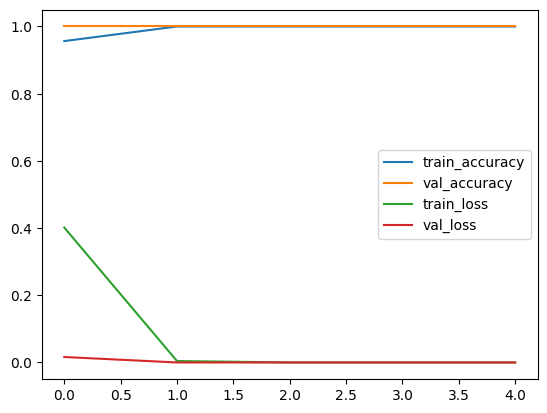

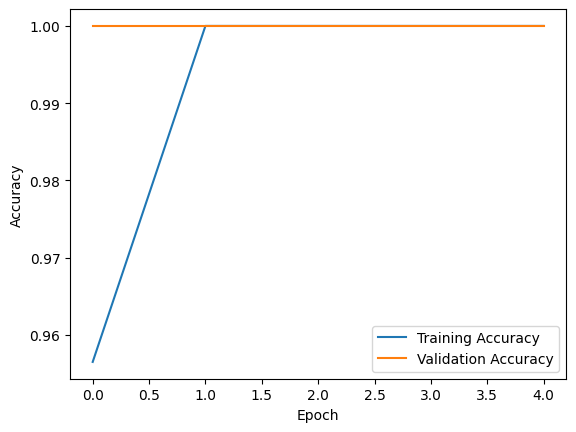

In [36]:

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [37]:
import pickle

# Save the tokenizer
with open('tokenizer.pkl', 'wb') as f:
    pickle.dump(tokenizer, f)
print(tokenizer)
# Save the trained model





model.save('sentiment_analysis_model.h5')

In [38]:
# Example prediction
example_text = "cryptocurrency is amazing."
if "cryptocurrency" in example_text or "crypto" in example_text:
    example_sequence = tokenizer.texts_to_sequences([example_text])
    example_padded = pad_sequences(example_sequence, maxlen=max_len, padding='post')
    sentiment_prediction = model.predict(example_padded)
    sentiment_label = "positive" if sentiment_prediction > 0.5 else "negative"
    print(f"\nInput Text: {example_text} \nSentiment Prediction: {sentiment_label}")
else:
    print("Invalid text. Please talk about cryptocurrency or crypto.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step

Input Text: cryptocurrency is amazing. 
Sentiment Prediction: positive


In [39]:
# Function for predicting labels on a new dataset with positive/negative labels
def predict_labels_on_new_data(model, tokenizer, max_len, input_file_path):
    # Load the new data
    new_df = pd.read_csv('/content/testfile2.csv')

    # Preprocess the text
    new_df['text'] = new_df['text'].apply(preprocess_text)

    # Tokenize and pad the sequences
    new_sequences = tokenizer.texts_to_sequences(new_df['text'])
    new_padded = pad_sequences(new_sequences, maxlen=max_len, padding='post')

    # Make predictions
    predictions = model.predict(new_padded)
    predictions = np.round(predictions).flatten().astype(int)

    # Map numerical labels to positive/negative strings
    new_df['predicted_label'] = predictions
    new_df['predicted_sentiment'] = new_df['predicted_label'].map({0: 'negative', 1: 'positive'})

    return new_df[['text', 'predicted_sentiment']]

# Example usage:
new_data_file_path = '/content/testfile2.csv'
predictions_df = predict_labels_on_new_data(model, tokenizer, max_len, new_data_file_path)
print(predictions_df)


FileNotFoundError: [Errno 2] No such file or directory: '/content/testfile2.csv'